## <font color = 'red'> Project: Predicting if a patient has heart disease

### <mark>Imports</mark>

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics

### <mark> Exploratory Data Analysis </mark>

In [3]:
# Read the data and display the dataset
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# View the shape of the dataset
df.shape

(918, 12)

In [9]:
# View the datatypes of dataset
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [11]:
# View column names
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [13]:
# Count the category of out target variable
df['HeartDisease'].value_counts().sum

<bound method Series.sum of HeartDisease
1    508
0    410
Name: count, dtype: int64>

In [15]:
# Check if there is any null value
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [17]:
# Drop null values if any and store it as a new dataset
df_subset = df.dropna(axis = 0).reset_index(drop = True)

Text(0.5, 1.0, 'Pie Chart for Heart Attack Classification')

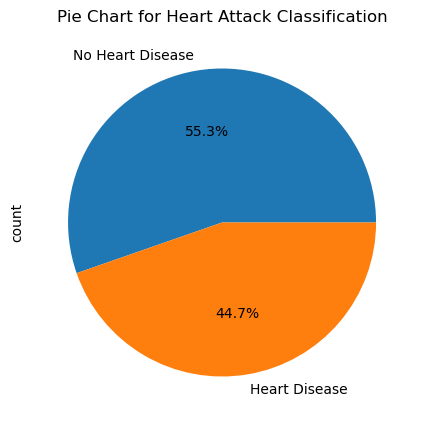

In [19]:
# Visualize the target variable through a pie chart
plt.figure(figsize=(5,5))
labels = ['No Heart Disease', 'Heart Disease']
df['HeartDisease'].value_counts().plot(kind='pie',labels=labels,autopct='%1.1f%%')
plt.title('Pie Chart for Heart Attack Classification')

#### <mark>Encoding categorical data</mark>

In [21]:
# Store the categorical columns to encode
encoder_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [23]:
# Call OneHotEncoder 
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [25]:
# Transofrm the categorical columns 
encoded_data = encoder.fit_transform(df_subset[encoder_columns])

In [31]:
# Store the encoded data into the dataframe
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(encoder_columns))

In [33]:
# Concatenate the encoded and non encoded dataframes
df_encoded = pd.concat([df.drop(encoder_columns, axis=1), encoded_df], axis=1)
df_encoded

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,156,1.0,1,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,98,0.0,0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,108,1.5,1,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,122,0.0,0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,1,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,141,3.4,1,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,115,1.2,1,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,174,0.0,1,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [35]:
# Separate the X and y features
X = df_encoded.drop('HeartDisease',axis=1)
y = df_encoded['HeartDisease']

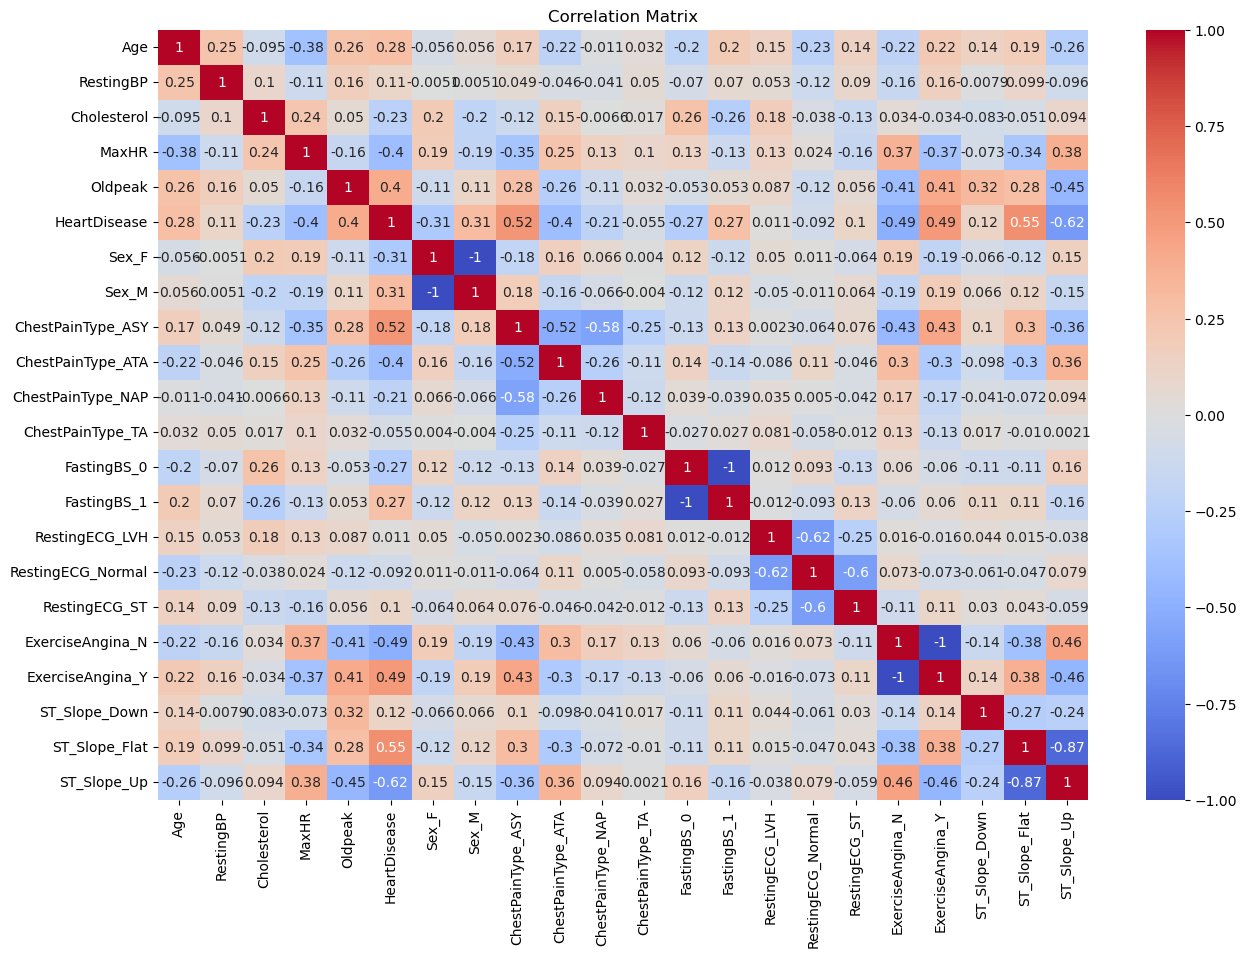

In [37]:
# Plot a correlation matrix to view the strength of features. Values close to 1 or -1 means more strength
plt.figure(figsize=(15,10))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### <mark>Splitting the dataset into train and test</mark>

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### <mark> Applying Logistic Regression </mark>

In [45]:
# Call and fit Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
# Store the prediction value in y pred variable
y_pred = model.predict(X_test)

In [49]:
# Show classification report to view accuracy, recall and f1 score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [29]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.853261
Precision: 0.900000
Recall: 0.841121
F1 Score: 0.869565


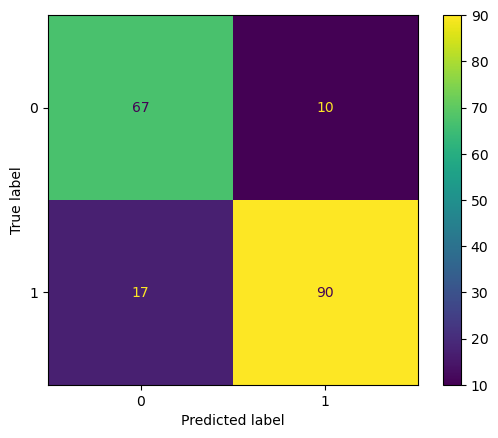

In [51]:
# Plot a confusion matrix 
cm = metrics.confusion_matrix(y_test, y_pred, labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels =model.classes_)
disp.plot()

<Axes: xlabel='ST_Slope_Up', ylabel='HeartDisease'>

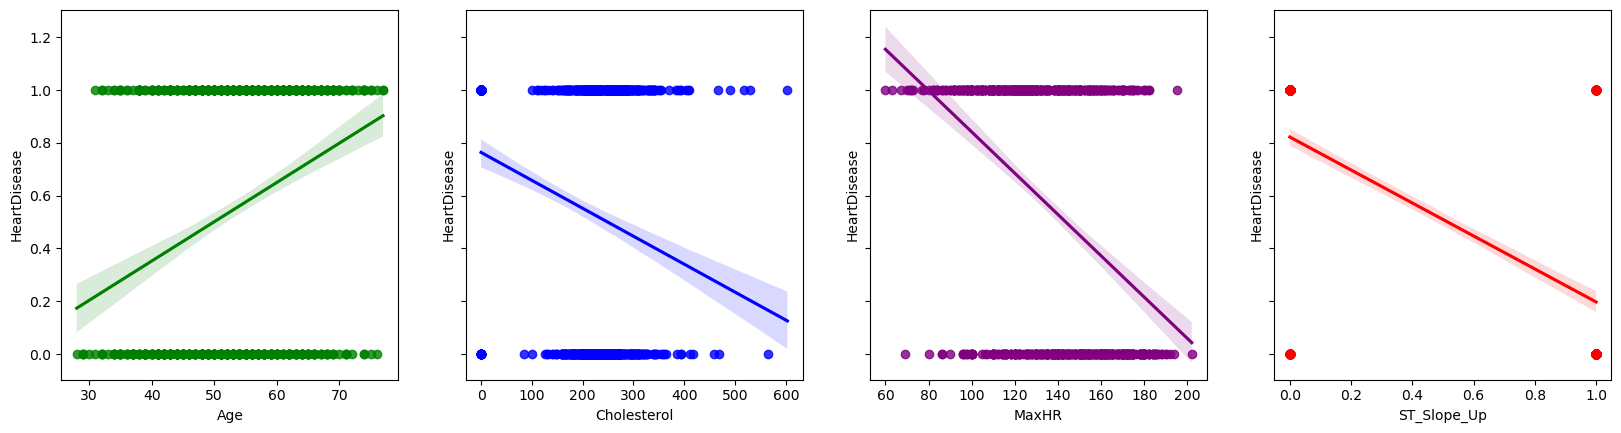

In [53]:
# Plotting a regression plot to view the correlation between the 4 most important features and the target feature
fig, (ax1, ax2, ax3,ax4) = plt.subplots(ncols=4, sharey=True)
fig.set_figwidth(20)
sns.regplot(x=X['Age'], y=y,color="g", ax=ax1)
sns.regplot(x=X['Cholesterol'], y=y, color="b", ax=ax2)
sns.regplot(x=X['MaxHR'], y=y, color="purple", ax=ax3)
sns.regplot(x=X['ST_Slope_Up'], y=y,color='r',ax=ax4)

### <mark>Standardizing the data </mark>

In [55]:
# Import and call the standard scaler to scale the features
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()

In [59]:
# Scale the X_test and X_train features
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [61]:
# Fit the model using scaled features
model = LogisticRegression().fit(X_train, y_train)

In [36]:
y_pred = model.predict(X_test)

In [63]:
# View the accuracy score, recall and f1 score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [38]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.858696
Precision: 0.900990
Recall: 0.850467
F1 Score: 0.875000


### <mark> Hyper Parameter Tuning using GridSearchCV</mark>

In [65]:
# Create a dictionary defining our different parameters to test
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [67]:
# Import Grid Search Cross Validation 
from sklearn.model_selection import GridSearchCV

In [69]:
# Call the Cross Validation model to identify the best parameters
clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [71]:
# Fit the Cross Validation model
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3120 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = 

In [73]:
# View the best parameters for our model
best_clf.best_estimator_

LogisticRegression(C=4.281332398719396, max_iter=5000, solver='sag')

In [75]:
# View the accuracy of the model after hyperparamete tuning
print (f'Accuracy : {best_clf.score(X,y):.3f}')

Accuracy : 0.875


### <mark>Determining Important Features </mark>

In [79]:
# Import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [159]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)

<Axes: >

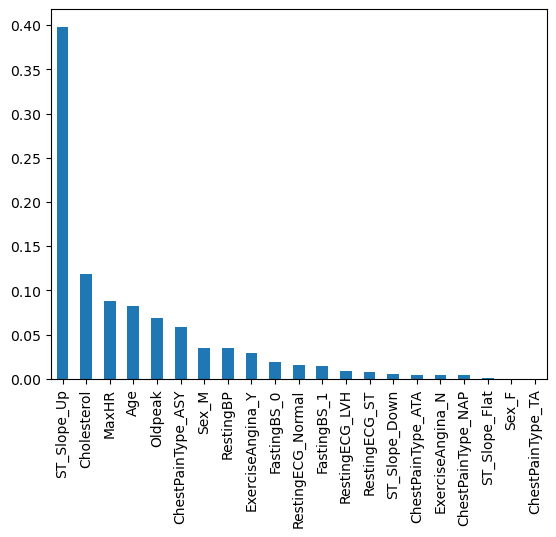

In [161]:
# Find out the most important features from the independant variables
importances = decision_tree.feature_importances_
forest_importances = pd.Series(importances,index=X.columns).sort_values(ascending=False)

fig,ax = plt.subplots()
forest_importances.plot.bar()

#### <mark>Fitting the model with only the important features to calculate metrics</mark>

In [81]:
# Define input features with only the 4 most important features
X = df_encoded[['ST_Slope_Up','Cholesterol','MaxHR','Age']]
y = df_encoded['HeartDisease']

In [83]:
# Scale the features
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [85]:
# Define the model
feature_model = LogisticRegression(C=4.281332398719396, max_iter=5000, solver='sag')

In [87]:
# Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [91]:
feature_model.fit(X_train,y_train)

LogisticRegression(C=4.281332398719396, max_iter=5000, solver='sag')

In [93]:
y_pred_new = feature_model.predict(X_test)

In [99]:
# View the accuracy score,f1 score and recall for the new model
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        77
           1       0.86      0.78      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184



### <mark> Using SVM</mark>

In [101]:
# Import Support Vector Machine
from sklearn.svm import SVC

In [103]:
# Split the target and input features
X = df_encoded.drop('HeartDisease',axis=1)
y = df_encoded['HeartDisease']

In [105]:
# Split train and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [107]:
# Scale the features
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [111]:
svm = SVC(kernel='linear')

In [113]:
# Fit the features in svm model
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [115]:
svm_pred = svm.predict(X_test)

In [117]:
# View the accuracy,f1 score and recall for svm 
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [119]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, svm_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, svm_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, svm_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, svm_pred))

Accuracy: 0.858696
Precision: 0.900990
Recall: 0.850467
F1 Score: 0.875000


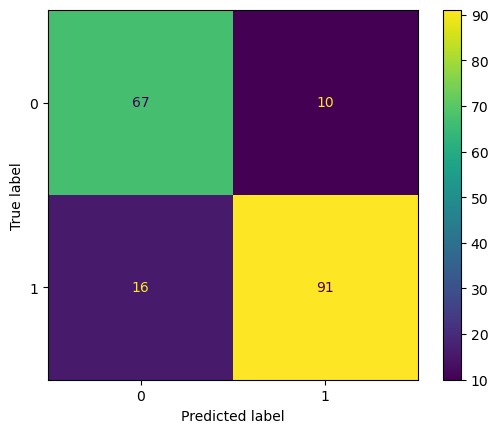

In [121]:
# Plot a confusion matrix
cm = metrics.confusion_matrix(y_test, svm_pred, labels = svm.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels =svm.classes_)
disp.plot()

### <mark>Using KNN </mark>

In [123]:
# Import Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

In [125]:
knn = KNeighborsClassifier(n_neighbors=1)

In [127]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [129]:
y_pred = knn.predict(X_test)

In [131]:
# View the accuracy, f1 score and recall
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.80        77
           1       0.90      0.76      0.82       107

    accuracy                           0.81       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.83      0.81      0.81       184



In [133]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.809783
Precision: 0.900000
Recall: 0.757009
F1 Score: 0.822335


In [137]:
# find the error where predicted values doesnt match the tested value from 1 to 40  and store the mean of two in error_rate array 
error_rate = []

for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

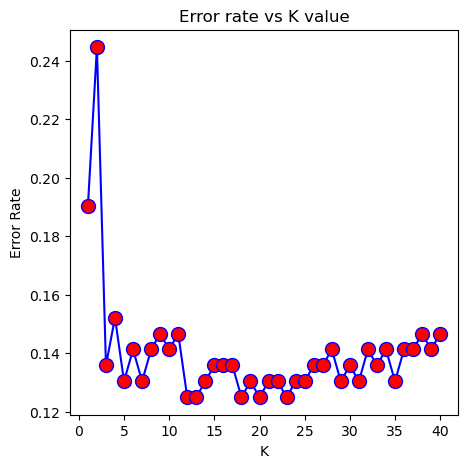

In [143]:
# Plot the error rate vs K value to determine optimum neighbor values
plt.figure(figsize=(5,5))
plt.plot(range(1,41),error_rate,color='b',linestyle='-',marker='o',markerfacecolor='r',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [145]:
# Define the model with new neighbors values
knn = KNeighborsClassifier(n_neighbors=12)

In [147]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [149]:
y_pred = knn.predict(X_test)

In [151]:
# View the accuracy,f1 score and recall
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [153]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.875000
Precision: 0.903846
Recall: 0.878505
F1 Score: 0.890995


##### Here we can determine that KNN had the best accuracy among the three models we used